In [1]:
from keras.applications.resnet import ResNet50

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 96% 259M/269M [00:01<00:00, 192MB/s]
100% 269M/269M [00:01<00:00, 183MB/s]


In [5]:
!unzip /content/gender-classification-dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./Validation/male/067031.jpg.jpg  
  inflating: ./Validation/male/067038.jpg.jpg  
  inflating: ./Validation/male/067040.jpg.jpg  
  inflating: ./Validation/male/067046.jpg.jpg  
  inflating: ./Validation/male/067048.jpg.jpg  
  inflating: ./Validation/male/067054.jpg.jpg  
  inflating: ./Validation/male/067064.jpg.jpg  
  inflating: ./Validation/male/067068.jpg.jpg  
  inflating: ./Validation/male/067069.jpg.jpg  
  inflating: ./Validation/male/067086.jpg.jpg  
  inflating: ./Validation/male/067091.jpg.jpg  
  inflating: ./Validation/male/067099.jpg.jpg  
  inflating: ./Validation/male/067101.jpg.jpg  
  inflating: ./Validation/male/067102.jpg.jpg  
  inflating: ./Validation/male/067112.jpg.jpg  
  inflating: ./Validation/male/067117.jpg.jpg  
  inflating: ./Validation/male/067119.jpg.jpg  
  inflating: ./Validation/male/067133.jpg.jpg  
  inflating: ./Validation/male/067143.jpg.jpg  
  inflating: ./Validation/male/067152

In [6]:
train_path = r"/content/Training"
test_path = r"/content/Validation"

In [7]:
i_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
# don't train existing weights
for layer in i_model.layers:
    layer.trainable = False

In [9]:
folders = glob(r'/content/Training/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(i_model.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=i_model.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory(r"/content/Training",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 47009 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(r"/content/Validation",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11649 images belonging to 2 classes.


In [17]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=200,
  validation_steps=130
)

Epoch 1/20
200/200 [==============================] - 132s 599ms/step - loss: 1.0254 - accuracy: 0.5891 - val_loss: 0.8109 - val_accuracy: 0.5447
Epoch 2/20
200/200 [==============================] - 118s 592ms/step - loss: 0.6311 - accuracy: 0.6869 - val_loss: 0.4992 - val_accuracy: 0.7488
Epoch 3/20
200/200 [==============================] - 117s 583ms/step - loss: 0.6569 - accuracy: 0.6792 - val_loss: 0.8151 - val_accuracy: 0.5837
Epoch 4/20
200/200 [==============================] - 116s 580ms/step - loss: 0.6570 - accuracy: 0.6898 - val_loss: 0.5740 - val_accuracy: 0.7082
Epoch 5/20
200/200 [==============================] - 116s 580ms/step - loss: 0.5193 - accuracy: 0.7531 - val_loss: 0.3974 - val_accuracy: 0.8293
Epoch 6/20
200/200 [==============================] - 116s 577ms/step - loss: 0.5617 - accuracy: 0.7405 - val_loss: 0.6413 - val_accuracy: 0.6834
Epoch 7/20
200/200 [==============================] - 116s 579ms/step - loss: 0.5655 - accuracy: 0.7427 - val_loss: 0.3741 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


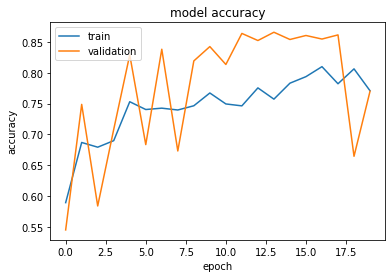

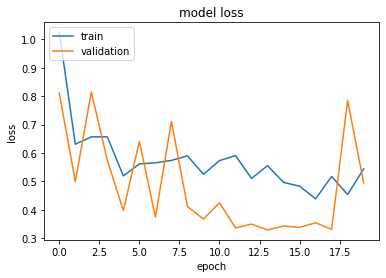

In [20]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
model.save("resnet_new_gender.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
